In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler

base = pd.read_csv('credit_card_clients.csv', header=1)
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']
base.head()

X = base.iloc[:, [1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\crist\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

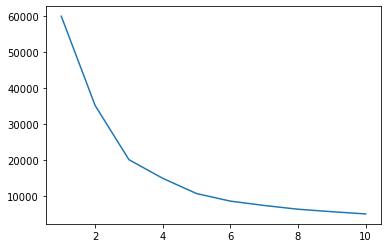

In [2]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)

Text(0, 0.5, 'Expenses')

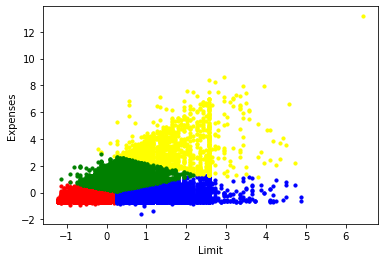

In [3]:
kmeans = KMeans(n_clusters=4, random_state=0)
predict = kmeans.fit_predict(X)

plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s=10, c='red')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s=10, c='blue')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s=10, c='yellow')
plt.scatter(X[predict == 3, 0], X[predict == 3, 1], s=10, c='green')
plt.xlabel('Limit')
plt.ylabel('Expenses')

# More than one attribute

In [4]:
X = base.iloc[:, [1,2,3,4,5,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

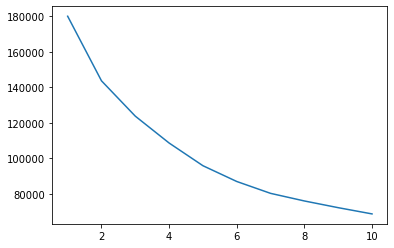

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0)
predict = kmeans.fit_predict(X)
print(predict)

[3 2 2 ... 1 3 3]


# Hierarchical Clustering

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np

base = pd.read_csv('credit_card_clients.csv', header = 1)
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

X = base.iloc[:,[1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
dendrogram = dendrogram(linkage(X, method = 'ward'))

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') #long time to run
previsoes = hc.fit_predict(X)

In [ ]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limit')
plt.ylabel('Expenses')
plt.legend()

# DBSCAN

In [15]:
base = pd.read_csv('credit_card_clients.csv', header = 1)
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

X = base.iloc[:,[1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.37, min_samples=4)
previsoes =dbscan.fit_predict(X)

uniques, qte = np.unique(predicts, return_counts=True)
print(uniques, qte)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67] [28985   111    52    41     6    33    11     8    24    16    55    24
     7    52     4    68    15    29    15    34    29    17    12    25
    11     5     6     5     5     4    14     4     4     7     7     4
    15    39     8     6     5    15     4     5     4     6    18     6
     4     4     6     6     8     6     6     4     6     6    11     6
     4     4     7     4     6     7     5     4     6]


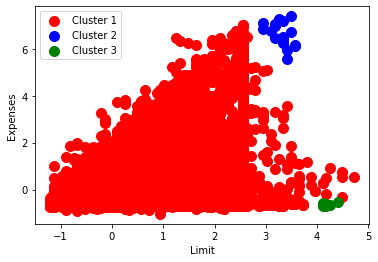

In [17]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limit')
plt.ylabel('Expenses')
plt.legend()